# Exploratory Data Analysis of Article-Level Dataset

The article-level dataset provides a rich amountt of information about articles on the content-level, such as the formatting, text, code, and resources (images/links). It is thus worth conducting an analysis on the article level.

# Import modules

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import Counter
pd.options.display.max_seq_items = None

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


# Read dataset

In [5]:
df = pd.read_csv("../../data/features_analysis/df_story_features_analysis_whole.csv", low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972614 entries, 0 to 5972613
Columns: 103 entries, AuthorArticlesClap_count to isPublication
dtypes: float64(54), int64(34), object(15)
memory usage: 4.6+ GB


In [8]:
df.head()

Index(['AuthorArticlesClap_count', 'AuthorArticlesClap_mean',
       'AuthorArticlesClap_median', 'AuthorArticlesClap_sum',
       'AuthorArticlesResponse_count', 'AuthorArticlesResponse_mean',
       'AuthorArticlesResponse_median', 'AuthorArticlesResponse_sum',
       'AuthorArticlesVoter_count', 'AuthorArticlesVoter_mean',
       'AuthorArticlesVoter_median', 'AuthorArticlesVoter_sum', 'BoldNum',
       'ClapCount_Card', 'ClapCount_Story', 'CodeBlockLengthMax',
       'CodeBlockLengthMean', 'CodeBlockLengthMedian', 'CodeBlockLengthMin',
       'CodeBlockLengthStd', 'CodeBlockLengthSum', 'CodeBlockNum',
       'CodeBlockRaw', 'CodeInlineNum', 'CodeInlineRaw', 'Company',
       'CompanyURL', 'HLightTextList', 'HasFeaturedImage', 'HlightNum',
       'ImgNum', 'ItalicNum', 'LinkNum', 'LinkURLList', 'ListOlLength',
       'ListOlMax', 'ListOlMean', 'ListOlMedian', 'ListOlMin', 'ListOlNum',
       'ListOlStd', 'ListOlSum', 'ListUlLength', 'ListUlMax', 'ListUlMean',
       'ListUlMedian', 

# Analysis

## Claps

### The median / mean number of claps is 1 / 70, and almost half of all articles have zero claps.

Median number of claps: 1.0
Mean number of claps: 69.78024580192191


Percentage of articles that have no claps:  48.25213884573823
Percentage of articles that have at least one clap:  51.74786115426177
Percentage of articles that have at least 10 claps:  27.34886265879563
Percentage of articles that have at least 100 claps:  10.625129968218271
Percentage of articles that have at least 1000 claps:  1.142447846118969


Text(0.5, 1.0, 'Distribution of Claps (log scale)')

Text(0.5, 0, 'Log1p ClapCount')

Text(0, 0.5, 'Number of articles')

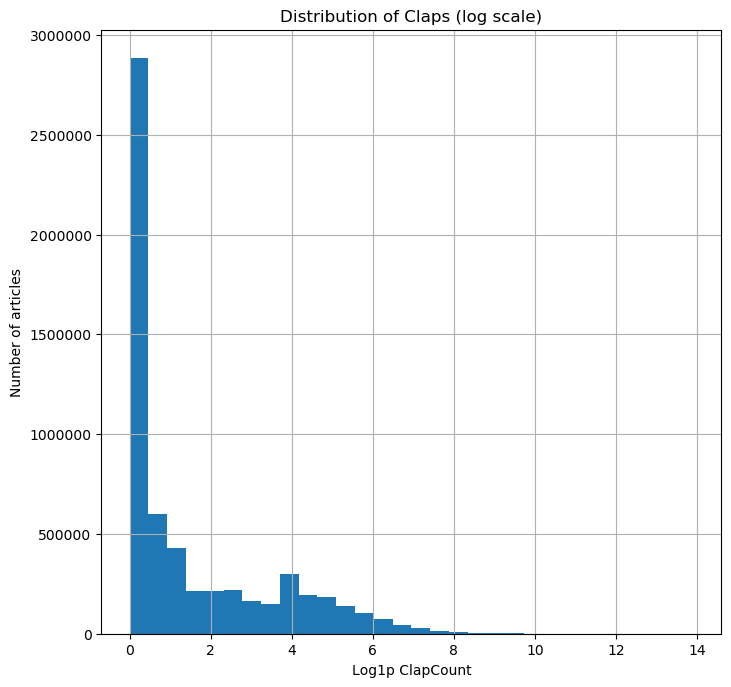

In [33]:
print("Median number of claps:", df.ClapCount_Story.median())
print("Mean number of claps:", df.ClapCount_Story.mean())

print("\n")
print("Percentage of articles that have no claps: ", 100 * len(df[df.ClapCount_Story == 0])/len(df))
print("Percentage of articles that have at least one clap: ", 100 * len(df[df.ClapCount_Story >= 1])/len(df))
print("Percentage of articles that have at least 10 claps: ", 100 * len(df[df.ClapCount_Story >= 10])/len(df))
print("Percentage of articles that have at least 100 claps: ", 100 * len(df[df.ClapCount_Story >= 100])/len(df))
print("Percentage of articles that have at least 1000 claps: ", 100 * len(df[df.ClapCount_Story >= 1000])/len(df))

np.log1p(df.ClapCount_Story).hist(bins=30)
plt.title("Distribution of Claps (log scale)")
plt.xlabel("Log1p ClapCount")
plt.ylabel("Number of articles")

# Text Dimension

Aspects: Word count and readability, sentiment

## Sentiment

### The majority of articles are skewed towards positive sentiment (higher polarity) and more factual style of writing (lower subjectivity).

Text(0.5, 1.0, 'Sentiment Polarity (negative -> positive emotion)')

Text(0.5, 1.0, 'Sentiment Subjectivity (factual -> opinionated)')

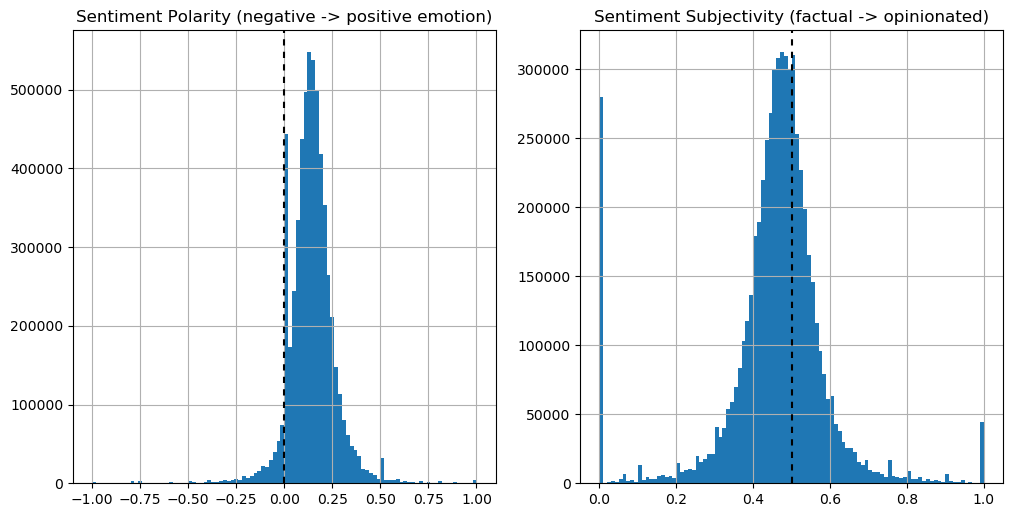

In [67]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
# figure(figsize=(10,8))

df.SentimentPolarity.hist(bins=100, ax=ax[0])
ax[0].set_title("Sentiment Polarity (negative -> positive emotion)")
ax[0].axvline(0, c="Black", dashes=[3, 3])

df.SentimentSubjectivity.hist(bins=100, ax=ax[1])
ax[1].set_title("Sentiment Subjectivity (factual -> opinionated)")
ax[1].axvline(0.5, c="Black", dashes=[3, 3])